# Restaurant rating prediction
### Goal is to predict how good or bad a restaurant will turn out in the future. So that, Zomato, the online food app, can take a decision to include the restaurant in their app or remove it.

### Our task is to create a machine learning model which can predict the Rating of a restaurant based on its characteristics.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data into python
ZomatoData=pd.read_csv('/content/drive/MyDrive/Data/ZomatoData.csv', encoding='latin')

In [3]:
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [4]:
# Removing duplicate rows if any
ZomatoData=ZomatoData.drop_duplicates()
print(ZomatoData.shape)

(9551, 19)


## DATA EXPLORATION- To understand the overall data

In [5]:
##Descriptive statistics of the data
ZomatoData.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


In [6]:
#Summarized information of data(Data types, Missing values, total rows etc.)
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [7]:
ZomatoData.shape

(9551, 19)

In [8]:
# Number of Unique variable in each column
ZomatoData.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

In [9]:
#Any Null-Value
ZomatoData.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

## Feature Engineering
Some of the columns cannot be used directly for machine learning because these are qualitative in nature so no general rules can be created from such columns.

However, we can extract some information from these columns, which can be used in ML.

In [10]:
# Function to count the number of cuisines
def cuisine_counter(inpStr):
    NumCuisines=len(str(inpStr).split(','))
    return(NumCuisines)

# Creating a new feature in data
ZomatoData['CuisineCount']=ZomatoData['Cuisines'].apply(cuisine_counter)

In [11]:
ZomatoData['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [12]:
### Currency  Conversion
def currencyConverter(ZomatoData):
  if ZomatoData['Currency']=='Botswana Pula(P)':
    return ZomatoData['Average Cost for two']*6.84
  if ZomatoData['Currency']=='Brazilian Real(R$)':
    return ZomatoData['Average Cost for two']*14.94
  if ZomatoData['Currency']=='Dollar($)':
    return ZomatoData['Average Cost for two']*74.23
  if ZomatoData['Currency']=='Emirati Diram(AED)':
    return ZomatoData['Average Cost for two']*20.21
  if ZomatoData['Currency']=='Indonesian Rupiah(IDR)':
    return ZomatoData['Average Cost for two']*0.0051
  if ZomatoData['Currency']=='NewZealand($)':
    return ZomatoData['Average Cost for two']*52.26
  if ZomatoData['Currency']=='Pounds(\x8c£)':
    return ZomatoData['Average Cost for two']*103.60
  if ZomatoData['Currency']=='Qatari Rial(QR)':
    return ZomatoData['Average Cost for two']*20.38
  if ZomatoData['Currency']=='Rand(R)':
    return ZomatoData['Average Cost for two']*5.21
  if ZomatoData['Currency']=='Sri Lankan Rupee(LKR)':
    return ZomatoData['Average Cost for two']*0.37
  if ZomatoData['Currency']=='Turkish Lira(TL)':
    return ZomatoData['Average Cost for two']*8.59
  else:
    return ZomatoData['Average Cost for two']


In [13]:
#Removing Qualitative Predictors
ColumnsToReject=['Restaurant ID', 'Restaurant Name','City', 'Address', 
                 'Locality','Locality Verbose', 'Switch to order menu']

ZomatoData = ZomatoData.drop(ColumnsToReject,axis=1)

In [14]:
ZomatoData.shape

(9551, 13)

In [15]:
catCols=['Country Code','Currency', 'Has Table booking','CuisineCount',
                 'Has Online delivery', 'Is delivering now','Price range']
conCols =['Longitude', 'Latitude', 'Votes', 'Average Cost for two']

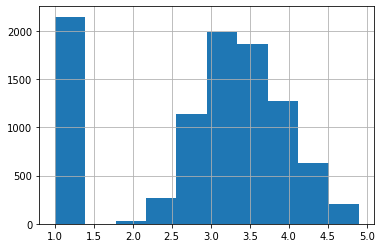

In [16]:
# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Continuous
ZomatoData['Rating'].hist()

### Visual Exploratory Data Analysis
 Categorical variables: Bar plot
 
 Continuous variables: Histogram

In [17]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

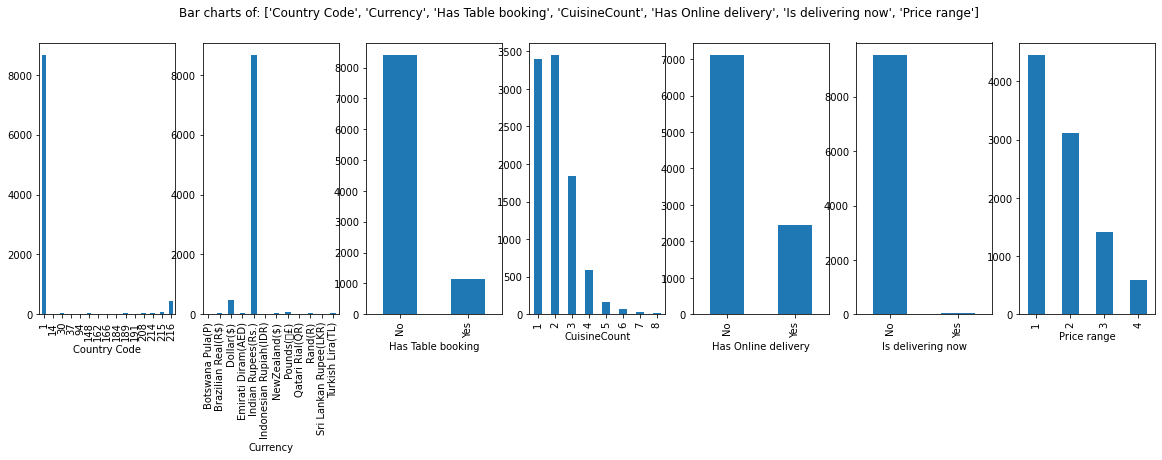

In [18]:
# Calling the function
PlotBarCharts(inpData=ZomatoData, colsToPlot=catCols)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0ca48810>,
      dtype=object)

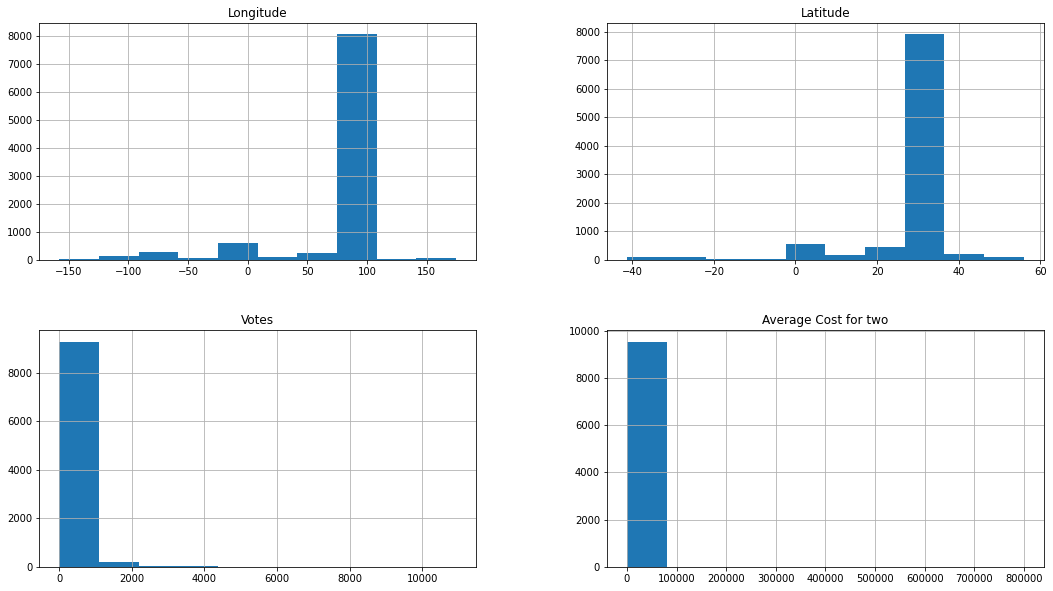

In [19]:
# Plotting histograms of multiple columns together
ZomatoData.hist(conCols, figsize=(18,10))

### Feature Engineering

In [20]:
## Bucket Currency
ZomatoData['Currency'][ZomatoData['Currency']!='Indian Rupees(Rs.)']='Non Indian Currency'

In [21]:
## Bucket Country Code
ZomatoData['Country Code'][ZomatoData['Country Code']>1]=2

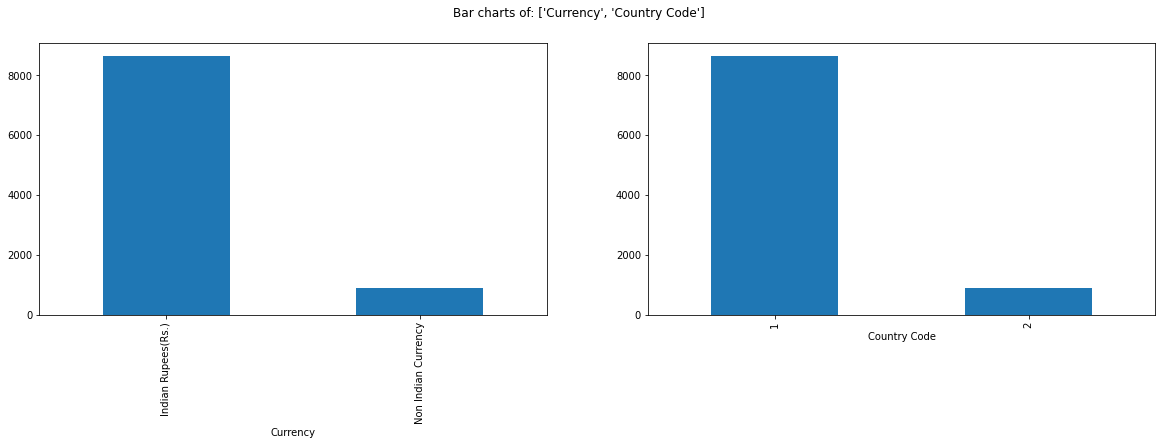

In [22]:
# Calling the function
PlotBarCharts(inpData=ZomatoData, colsToPlot=['Currency','Country Code'])

## Outlier treatment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0c71f050>]],
      dtype=object)

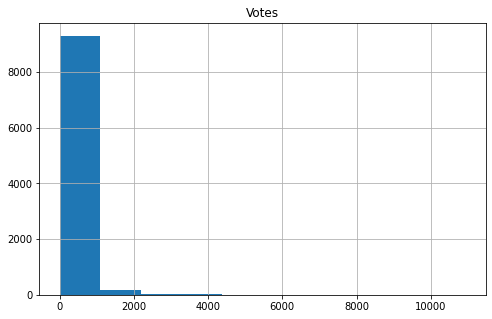

In [23]:
#Looking at Distribution in Voltes
ZomatoData.hist('Votes', figsize=(8,5))

In [24]:
# Replacing outliers for 'Votes'
# Finding nearest values to 3000 mark
ZomatoData['Votes'][ZomatoData['Votes']<3000].sort_values(ascending=False)

4649    2860
9167    2847
1258    2843
4087    2826
1555    2806
        ... 
2089       0
1056       0
1057       0
2088       0
2823       0
Name: Votes, Length: 9512, dtype: int64

In [25]:
# Replacing outliers with nearest possibe value
ZomatoData['Votes'][ZomatoData['Votes']>3000] =2860

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0c718dd0>]],
      dtype=object)

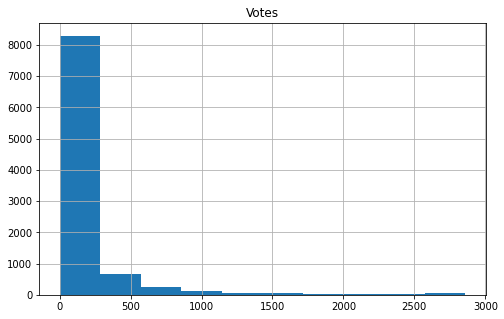

In [26]:
#Looking at distribution after Treatment
ZomatoData.hist('Votes', figsize=(8,5)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0c63e690>]],
      dtype=object)

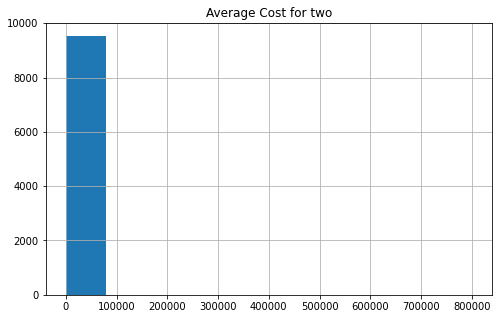

In [27]:
#Looking at Distribution
ZomatoData.hist('Average Cost for two', figsize=(8,5))

In [28]:
# Replacing outliers for 'Average Cost for two'
# Finding nearest values to 8000 mark
ZomatoData['Average Cost for two'][ZomatoData['Average Cost for two']<6500].sort_values(ascending=False)

7499    6000
7538    6000
7492    6000
7494    6000
8       6000
        ... 
637        0
84         0
85         0
87         0
9242       0
Name: Average Cost for two, Length: 9527, dtype: int64

In [29]:
# Replacing outliers with nearest possibe value
ZomatoData['Average Cost for two'][ZomatoData['Average Cost for two']>6500] =6000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0c5cd850>]],
      dtype=object)

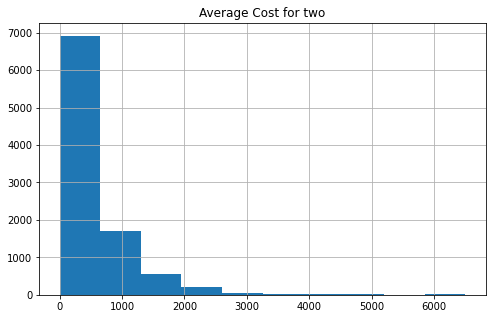

In [30]:
#Looking at Distribution after treatment
ZomatoData.hist('Average Cost for two', figsize=(8,5))

In [31]:
# Finding how many missing values are there for each column
ZomatoData.isnull().sum()

Country Code            0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
CuisineCount            0
dtype: int64

##### No missing Value Found


# Feature Selection

## Relationship exploration

### Visual exploration of relationship between variables
Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

### Statistical measurement of relationship strength between variables
Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

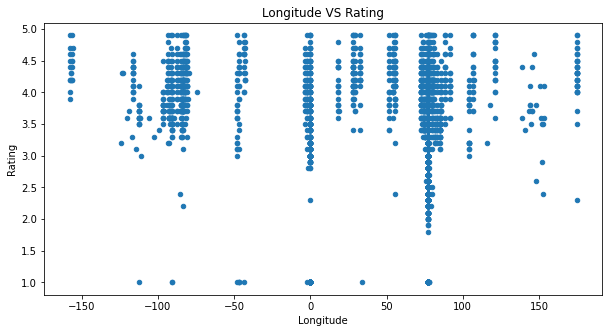

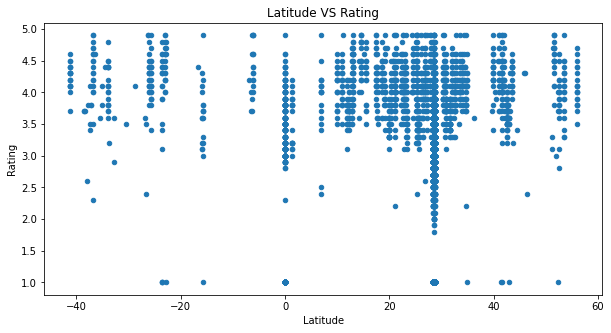

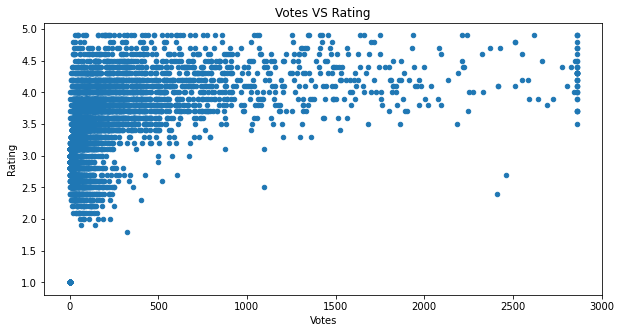

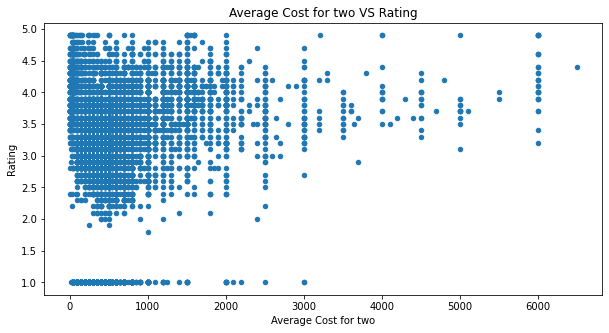

In [32]:
# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
ContinuousCols=['Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    ZomatoData.plot.scatter(x=predictor, y='Rating', figsize=(10,5), title=predictor+" VS "+ 'Rating')

In [33]:
# Calculating correlation matrix
ContinuousCols=['Rating','Longitude', 'Latitude', 'Votes', 'Average Cost for two']
CorrelationData=ZomatoData[ContinuousCols].corr()
CorrelationData

,Rating,Longitude,Latitude,Votes,Average Cost for two
Rating,1.000000,-0.145930,-0.019806,0.406130,0.257248
Longitude,-0.145930,1.000000,0.043207,-0.112820,0.218483
Latitude,-0.019806,0.043207,1.000000,-0.018841,-0.049758
Votes,0.406130,-0.112820,-0.018841,1.000000,0.263180
Average Cost for two,0.257248,0.218483,-0.049758,0.263180,1.000000


#### Selected Continuous columns for further process:   'Votes', 'Average Cost for two'

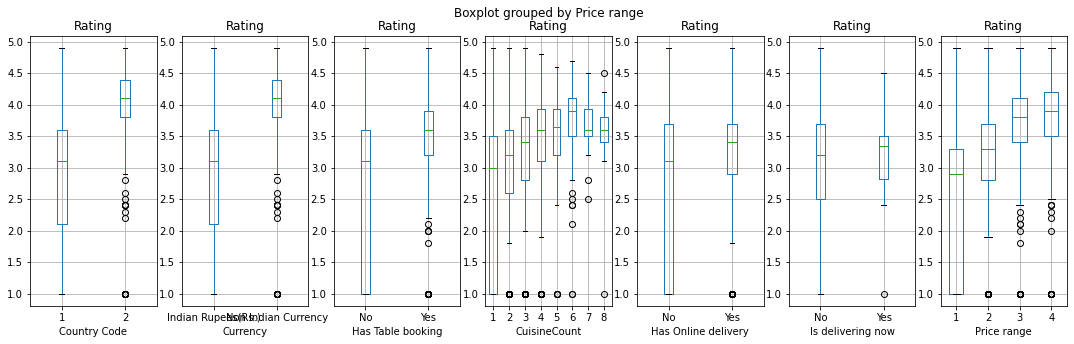

In [34]:
# Box plots for Categorical Target Variable "Rating" and continuous predictors
CategoricalColsList=['Country Code','Currency', 'Has Table booking','CuisineCount',
                 'Has Online delivery', 'Is delivering now','Price range']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Rating"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    ZomatoData.boxplot(column='Rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [35]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)



# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Country Code','Currency', 'Has Table booking','CuisineCount',
                          'Has Online delivery', 'Is delivering now','Price range']
FunctionAnova(inpData=ZomatoData, 
              TargetVariable='Rating', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Country Code is correlated with Rating | P-Value: 3.8537843967916784e-244
Currency is correlated with Rating | P-Value: 3.8537843967916784e-244
Has Table booking is correlated with Rating | P-Value: 3.9393041304297214e-82
CuisineCount is correlated with Rating | P-Value: 2.966761410665348e-136
Has Online delivery is correlated with Rating | P-Value: 1.6952587420575958e-92
Is delivering now is NOT correlated with Rating | P-Value: 0.13200822438738005
Price range is correlated with Rating | P-Value: 0.0


['Country Code',
 'Currency',
 'Has Table booking',
 'CuisineCount',
 'Has Online delivery',
 'Price range']

## Data Pre-processing for Machine Learning

In [36]:
# Selecting final columns
SelectedColumns=['Rating','Votes','Average Cost for two','Has Table booking',
                 'Has Online delivery','Price range','Country Code','CuisineCount']

DataForML=ZomatoData[SelectedColumns]
DataForML.head()

# Saving this final data for reference during deployment
DataForML.to_pickle('DataForMLRating.pkl')

In [37]:
# Converting the binary nominal variable sex to numeric
DataForML['Has Table booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Has Online delivery'].replace({'Yes':1, 'No':0}, inplace=True)

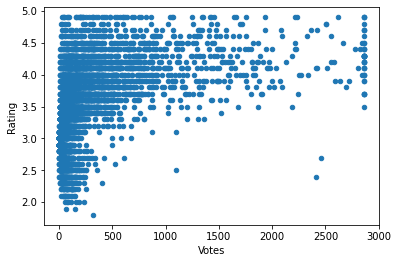

In [38]:
DataForML[(DataForML['Votes']>1) & (DataForML['Rating']>1)].plot.scatter(x='Votes',y='Rating')

In [39]:
DataForML['VotesLOG']=np.log(DataForML['Votes'])

In [40]:
# Replacing infinite with nan
DataForML.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
DataForML.dropna(inplace=True)

In [41]:
# Selecting final columns
SelectedColumns=['Rating','VotesLOG','Average Cost for two','Has Table booking',
                 'Has Online delivery','Price range','Country Code','CuisineCount']

DataForML_Numeric=DataForML[SelectedColumns]
DataForML_Numeric.head()

,Rating,VotesLOG,Average Cost for two,Has Table booking,Has Online delivery,Price range,Country Code,CuisineCount
0,4.8,5.749393,1100,1,0,3,2,3
1,4.5,6.381816,1200,1,0,3,2,1
2,4.4,5.598422,4000,1,0,4,2,4
3,4.9,5.899897,1500,0,0,4,2,2
4,4.8,5.433722,1500,1,0,4,2,2


## Machine Learning: Splitting the data into Training and Testing sample

In [42]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'
Predictors=['VotesLOG', 'Average Cost for two', 'Has Table booking','Has Online delivery', 'Price range','Country Code', 'CuisineCount']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Normalization of data

In [43]:
### Normalization of data 
from sklearn.preprocessing import MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5919, 7)
(5919,)
(2538, 7)
(2538,)


### Multiple Linear Regression

In [44]:

# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Value: 0.6649853927882008

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.8              4.0
1     3.4              3.0
2     3.6              4.0
3     1.0              2.0
4     4.3              4.0
Mean Accuracy on test data: 75.23031344581095
Median Accuracy on test data: 86.95652173913044

Accuracy values for 10-fold Cross Validation:
 [89.33320881 78.72664605 82.24293686 79.35111916 80.91527592 75.76314706
 74.96470332 73.59645384 70.48598712 79.70911776]

Final Average Accuracy of the model: 78.51


## Decision Tree Regressor

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
R2 Value: 0.8602342175634814

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.8              4.0
1     3.4              3.0
2     3.6              3.0
3     1.0              1.0
4     4.3              4.0
Mean Accuracy on test data: 90.63446005460447
Median Accuracy on test data: 92.85714285714285

Accuracy values for 10-fold Cross Validation:
 [89.44440205 91.51123327 91.59267357 92.15412611 92.37043655 93.10831997
 92.84387569 93.31785416 91.87867469 91.00129456]

Final Average Accuracy of the model: 91.92


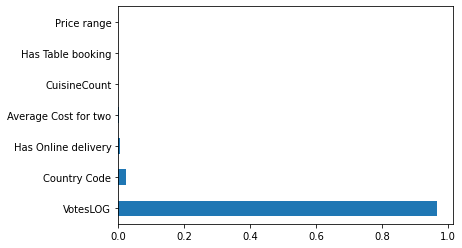

In [45]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## RandomForest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
R2 Value: 0.8103037589637008

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.8              4.0
1     3.4              3.0
2     3.6              3.0
3     1.0              1.0
4     4.3              4.0
Mean Accuracy on test data: 90.21674605352365
Median Accuracy on test data: 92.85714285714285

Accuracy values for 10-fold Cross Validation:
 [88.95908473 90.49753155 90.69503199 91.58420734 91.28521816 91.68376792
 91.45349868 92.2304102  90.41469319 88

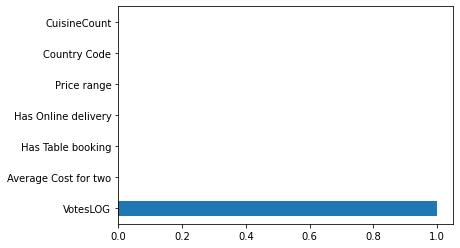

In [46]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## ADABoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

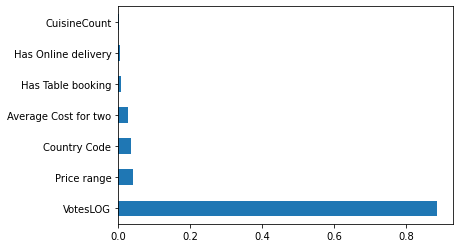

In [47]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
[11:45:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.8810114953580523

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.8              4.0
1     3.4              3.0
2     3.6              3.0
3     1.0              1.0
4     4.3              4.0
Mean Accuracy on test data: 90.8717226056881
Median Accuracy on test data: 92.85714285714285
[11:45:30] WARNING: /workspace/src/objective/

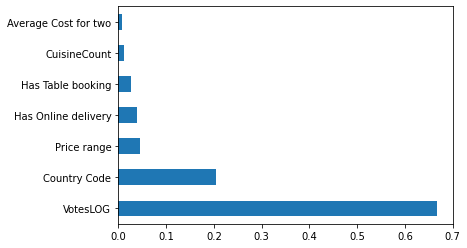

In [48]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Light Gradient Boosting

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
R2 Value: 0.897288773603028

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.8              4.0
1     3.4              3.0
2     3.6              4.0
3     1.0              1.0
4     4.3              4.0
Mean Accuracy on test data: 90.92244119379512
Median Accuracy on test data: 92.85714285714285
[11:45:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:lin

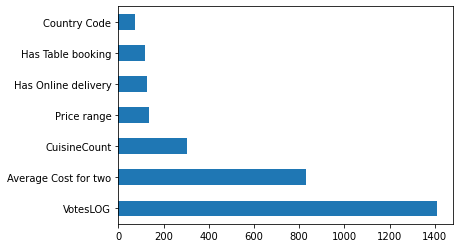

In [49]:
import lightgbm as lgb  
clf = lgb.LGBMRegressor()

# Printing all the parameters 
print(clf)

# Creating the model on Training Data
Lgboost=clf.fit(X_train,y_train)
prediction=Lgboost.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, Lgboost.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(Lgboost.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## CatBoost

0:	learn: 0.8788717	total: 48.4ms	remaining: 194ms
1:	learn: 0.8095171	total: 50.1ms	remaining: 75.1ms
2:	learn: 0.7482159	total: 51.7ms	remaining: 34.5ms
3:	learn: 0.6935720	total: 53.2ms	remaining: 13.3ms
4:	learn: 0.6458128	total: 54.8ms	remaining: 0us

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.8              3.0
1     3.4              3.0
2     3.6              3.0
3     1.0              2.0
4     4.3              3.0
Mean Accuracy on test data: 75.36227208680356
Median Accuracy on test data: 84.61538461538461
[11:46:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:22] WARNING: /workspace/src/objective/r

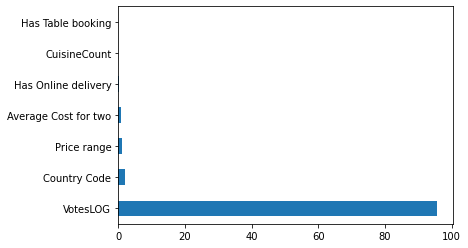

In [50]:
!pip install catboost
from catboost import CatBoostRegressor

clf = CatBoostRegressor(iterations=5, learning_rate=0.1, loss_function='RMSE')

CAT= clf.fit(X_train, y_train)

prediction=CAT.predict(X_test)



# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(CAT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## K-Nearest Neighbor(KNN)

In [51]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
R2 Value: 0.9054848831754214

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.8              4.0
1     3.4              3.0
2     3.6              4.0
3     1.0              2.0
4     4.3              4.0
Mean Accuracy on test data: 89.76509721243103
Median Accuracy on test data: 92.85714285714285

Accuracy values for 10-fold Cross Validation:
 [88.39909736 89.97800116 90.1077883  90.90870749 91.38502239 91.30905317
 91.54974881 92.4033512  90.08012692 89.78549471]

Final Average Accuracy of the model: 90.59


## Support Vector Machines(SVM)

In [52]:
from sklearn import svm
RegModel = svm.SVR(C=5, kernel='rbf', degree=20, gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=5, cache_size=200, coef0=0.0, degree=20, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 Value: 0.621717786661435

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.8              4.0
1     3.4              3.0
2     3.6              4.0
3     1.0              2.0
4     4.3              4.0
Mean Accuracy on test data: 78.09383671099872
Median Accuracy on test data: 90.9090909090909

Accuracy values for 10-fold Cross Validation:
 [89.84490407 77.02593566 80.96217819 77.8307748  79.42518783 72.32605171
 70.03307064 69.00399447 64.41474899 76.61050604]

Final Average Accuracy of the model: 75.75


## Deployment of the Model
### Based on the above trials we are having 2 Algorithm with similar kind of average accuracy(91.98) but we are Choosing/selcting LightGradientBoosting over XGBRegressor because it is around 7times Faster

In [53]:
## Back to normal data
DataForML['Votes']=np.exp(DataForML['VotesLOG'])

In [54]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Votes', 'Average Cost for two', 'Has Table booking','Has Online delivery', 'Price range','Country Code', 'CuisineCount']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values



###  Normalization of data
from sklearn.preprocessing import MinMaxScaler
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(8457, 7)
(8457,)


## Retraining the model using 100% data

In [55]:
# choose from different tunable hyper parameters
# Decision Trees (Multiple if-else statements!)
RegModel = lgb.LGBMRegressor(max_depth=7,num_leaves = 150)

# Creating the model on Training Data
Lgboost=RegModel.fit(X_train,y_train)
FinalModel=Lgboost.fit(X,y)

##Cross validating the final model accuracy

In [56]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [90.34521286 91.72995765 91.66518586 92.20915136 92.48369119 93.20517499
 92.97808902 93.49776677 92.13131743 91.40869918]

Final Average Accuracy of the model: 92.17


## . Save the model as a serialized file which can be stored anywhere

In [57]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalModel, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


### Create a python function

In [58]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForMLRating.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=[ 'Votes', 'Average Cost for two', 'Has Table booking','Has Online delivery', 'Price range','Country Code', 'CuisineCount' ]
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)